#Practical 5 :- WAPP to implement the following geometric machine learning algorithm

1. K Nearest neighbor KNN
2. Perceptron
3. ANN using back propogation
4. Linear and Logistic Regresssion


Writeups

Explain KNN and Working of KNN
Explain Perceptron
Explain ANN and Back Propogation
Explain Linear and Logistic Regression




**A) K-Nearest Neighbor**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

iris=datasets.load_iris()
x=iris.data
y=iris.target

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0)

knn=KNeighborsClassifier(n_neighbors=7).fit(xtrain,ytrain)
accuracy=knn.score(xtest,ytest)
knn_pre=knn.predict(xtest)
cm=confusion_matrix(ytest,knn_pre)
print("*************************Confusion Matrix**************************")
print(cm)
print("*****************************Accuracy******************************")
print(accuracy*100)

*************************Confusion Matrix**************************
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
*****************************Accuracy******************************
97.36842105263158


**B) Perceptron**

In [ ]:
import numpy as np

class NeuralNetwork:
  def __init__(self, input_size, hidden_size, output_size, learning_rate = 0.1):
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.learning_rate = learning_rate
    self.weights1 = np.random.randn(self.input_size, self.hidden_size)
    self.bias1 = np.zeros((1, self.hidden_size))
    self.weights2 = np.random.randn(self.hidden_size, self.output_size)
    self.bias2 = np.zeros((1, self.output_size))
  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))
  def sigmoid_derivative(self, x):
    return x * (1 - x)
  def forward(self, X):
    self.z1 = np.dot(X, self.weights1) + self.bias1
    self.a1 = self.sigmoid(self.z1)
    self.z2 = np.dot(self.a1, self.weights2) + self.bias2
    self.output = self.sigmoid(self.z2)
    return self.output
  def backward(self, X, y, output):
    self.error = y - output
    self.output_delta = self.error * self.sigmoid_derivative(output)
    self.a1_error = self.output_delta.dot(self.weights2.T)
    self.a1_delta = self.a1_error * self.sigmoid_derivative(self.a1)
    self.weights2 += self.a1.T.dot(self.output_delta) * self.learning_rate
    self.bias2 += np.sum(self.output_delta, axis=0, keepdims=True) * self.learning_rate
    self.weights1 += X.T.dot(self.a1_delta) * self.learning_rate
    self.bias1 += np.sum(self.a1_delta, axis=0, keepdims=True) * self.learning_rate
  def train(self, X, y, epochs=10000):
    for epoch in range(epochs):
      output = self.forward(X)
      self.backward(X, y, output)
  def predict(self, X):
    return self.forward(X)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)
nn.train(X, y)
for x in X:
  print(f"Input: {x}, Predicted Output: {nn.predict(x)}")

Input: [0 0], Predicted Output: [[0.01079724]]
Input: [0 1], Predicted Output: [[0.03243132]]
Input: [1 0], Predicted Output: [[0.03191149]]
Input: [1 1], Predicted Output: [[0.95693628]]


**C) Linear Regression**

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
     Actual      Predicted
0   37731.0   40835.105909
1  122391.0  123079.399408
2   57081.0   65134.556261
3   63218.0   63265.367772
4  116969.0  115602.645454
5  109431.0  108125.891499
6  112635.0  116537.239698
7   55794.0   64199.962017
8   83088.0   76349.687193
9  101302.0  100649.137545


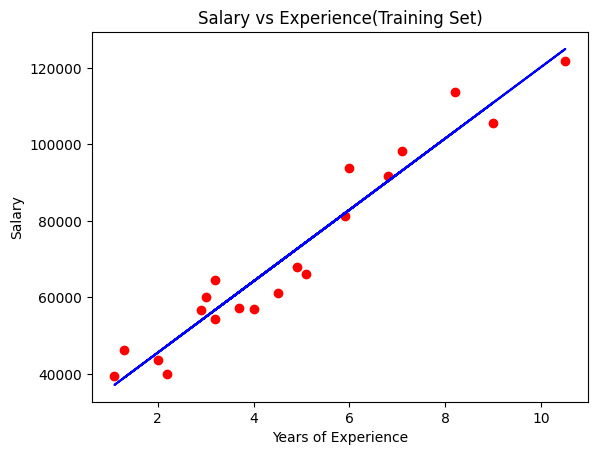

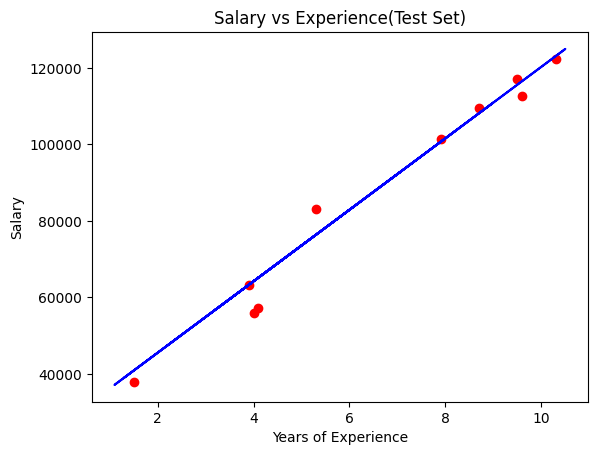


Training Score: 0.9381900012894278
Test Score: 0.9749154407708353


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data_set = pd.read_csv('salary_data.csv')
df=data_set.head()
print(df)
print("")

x=data_set.iloc[:,:-1].values
y=data_set.iloc[:,1].values
print(x)
print("")
print(y)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)
r=LinearRegression()
r.fit(x_train,y_train)

#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
y_pred=r.predict(x_test)
x_pred=r.predict(x_train)

df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df)

plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,x_pred,color='blue')
plt.title('Salary vs Experience(Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,x_pred,color='blue')
plt.title('Salary vs Experience(Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


train_score=r.score(x_train,y_train)
test_score=r.score(x_test,y_test)
print("")
print("Training Score:",train_score)
print("Test Score:",test_score)



**3) Logistic Regression**

    gmat  gpa  work_experince  admitted
0    780  4.0               3         1
1    750  3.9               4         1
2    690  3.3               3         0
3    710  3.7               5         1
4    680  3.9               4         0
5    730  3.7               6         1
6    690  2.3               1         0
7    720  3.3               4         1
8    740  3.3               5         1
9    690  3.3               1         0
10   610  2.7               3         0
11   690  3.7               5         1
12   710  2.7               6         1
13   680  2.3               4         0
14   770  3.3               3         1
15   610  2.2               1         0
16   580  2.3               4         0
17   650  2.7               6         1
18   540  3.0               2         0
19   590  3.3               3         0
20   620  3.7               2         1
21   600  2.3               1         0
22   550  3.7               4         0
23   550  3.3               1         0


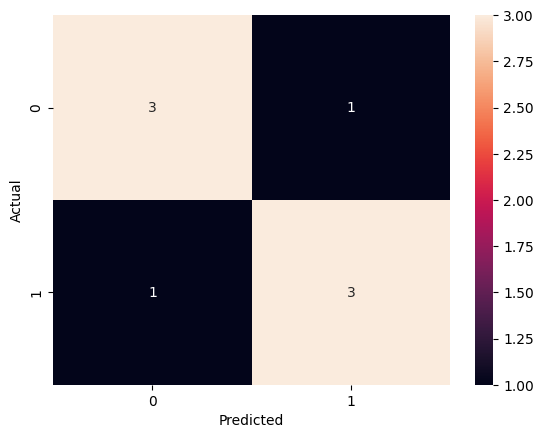

0.75
[0 0 1 1 0 0 1 1]
22    0
20    1
25    1
4     0
10    0
15    0
28    1
11    1
Name: admitted, dtype: int64
    gmat  gpa  work_experince
22   550  3.7               4
20   620  3.7               2
25   670  2.7               6
4    680  3.9               4
10   610  2.7               3
15   610  2.2               1
28   650  3.3               6
11   690  3.7               5
    gmat  gpa  work_experince
18   540  3.0               2
29   660  2.3               5
27   580  3.3               2
35   650  3.4               1
37   580  3.7               1
2    690  3.3               3
39   690  3.5               5
30   640  2.7               1
34   680  3.1               5
16   580  2.3               4
36   670  3.5               2
8    740  3.3               5
13   680  2.3               4
5    730  3.7               6
17   650  2.7               6
14   770  3.3               3
33   660  3.7               6
7    720  3.3               4
32   660  1.7               4
1    750  3.9 

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
candidates={'gmat':[780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
            'gpa':[4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,3.3,2.7,3.7,2.7,2.3,3.3,2.2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7,3.1,3.4,3.5,3.7,3.7,3.5],
            'work_experince':[3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
            'admitted':[1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]}
df=pd.DataFrame(candidates,columns=['gmat','gpa','work_experince','admitted'])
print(df)
x=df[['gmat','gpa','work_experince']]
y=df['admitted']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True)
plt.show()
print(metrics.accuracy_score(y_test,y_pred))
print(y_pred)
print(y_test)
print(x_test)
print(x_train)
plt.show()